In [1]:
from app import create_app, db
from app.instrument import Instrument
from app.analysis import Quote
with create_app().app_context():
    instruments = {b.symbol: b for b in Instrument.find_etfs(100)}
    quote = Quote([*instruments.keys()], 120)
    quote.update_boosts(21, instruments)
    db.session.commit()
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-02-25 to 2019-06-21 - 100'

In [2]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 8) & (stat['21-mean'] > 0.8)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
XLP,62,2.271503,1.545243,1.362139,4.021399
SPLV,62,2.006881,1.369318,1.343892,1.971361
IPAY,62,3.000988,2.515622,1.126688,5.347951
MTUM,62,1.855401,1.922174,0.878555,2.859384
PPA,62,2.635153,2.833582,0.871154,4.581305
FINX,62,2.200034,2.380889,0.854037,5.312173
XAR,62,2.549642,3.037169,0.784604,6.769803
VPU,62,1.417281,1.820403,0.686998,3.258989
XLU,62,1.460759,1.911888,0.676866,3.426057


In [3]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2, ['SPLV'], cr=3, dr=3)

['SPLV', 'XLP'] 2.3578255602441924 0.48940037970150096 1.198551820144559 -2.706031039293988
['SPLV', 'PPA'] 2.1106606157270313 0.13136904087729095 1.3105330730381337 -2.215045726019243


['SPLV', 'PPA']

In [4]:
quote.setup_mask(['SPLV', 'PPA'])
quote.find_optimal_ratio(21, 2)

     fun: 1.665225972603932
     jac: array([3.32995811, 3.33316851])
 message: 'Optimization terminated successfully.'
    nfev: 8
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.84615089, 0.15384911])


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


({'SPLV': 0.8461508930691783, 'PPA': 0.15384910693082166}, 2.1035, 1.2904)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,62.0,2.092900,1.290758,-0.972169,1.406100,1.945901,2.826620,4.810663,1.492328,1.797686
SPLV,62.0,2.006881,1.369318,-0.950248,1.177570,1.909380,2.779976,4.955301,1.343892,1.971361
PPA,62.0,2.635153,2.833582,-3.861003,0.889055,3.082406,4.353655,8.336261,0.871154,4.581305


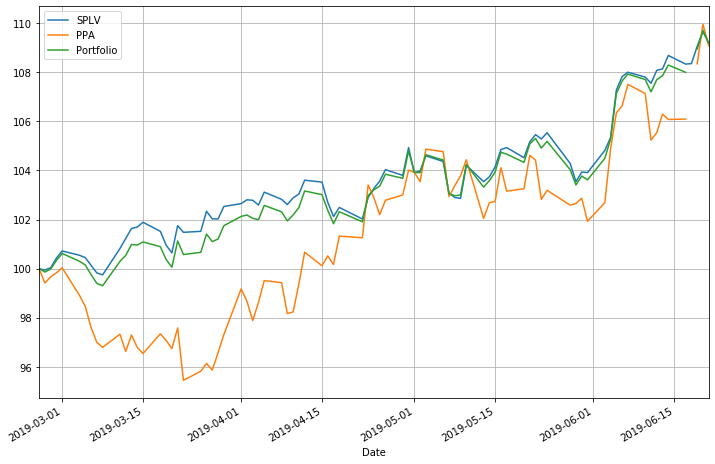

In [5]:
%pylab inline
quote.graph(21, {'SPLV': 0.85, 'PPA': 0.15})